Code used to produce all of the figures in the thesis, along with other calculations and experimentation that was conducted throughout the thesis

Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pygsp
import random
from pygsp import graphs, filters, plotting

## Moore-Penrose pseudo-inverse

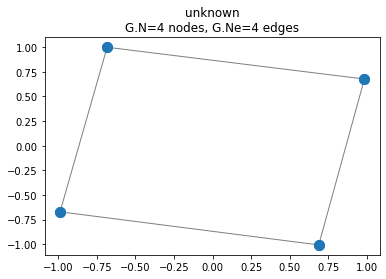

In [2]:
# Defining the structure for the graph with the adjacency matrix
adjMat = np.array([[0,1,0,1],
              [1,0,1,0],
              [0,1,0,1],
              [1,0,1,0]])

SG = graphs.Graph(adjMat)
SG.set_coordinates()
SG.plot()

Adjacency Matrix is Singular

In [3]:
np.linalg.det(adjMat)

0.0

Moore-Penrose pseudo-inverse matrix

In [4]:
adjMat_pinv = np.linalg.pinv(adjMat)
adjMat_pinv

array([[-1.96261557e-17,  2.50000000e-01,  1.96261557e-17,
         2.50000000e-01],
       [ 2.50000000e-01,  3.92523115e-17,  2.50000000e-01,
         0.00000000e+00],
       [-7.85046229e-17,  2.50000000e-01, -3.92523115e-17,
         2.50000000e-01],
       [ 2.50000000e-01,  3.92523115e-17,  2.50000000e-01,
         0.00000000e+00]])

## Experimentation with Invertible Polynomials of A and L and vertex polynomial filters

In [5]:
# Checks if a polynomial of A or L is invertible
def checkI(f):
    if(np.linalg.det(f) != 0):
        return("Invertible")
    else:
        return("Singular")

#Checks if either of the following polynomials of A are invertible 
def checkI_1(W,I,i):
    fT = 0
    gT = 0
    I = np.identity(i)
    f = np.dot(np.dot(W,W),W) + 3 * np.dot(W,W) - 2 * I
    g = np.dot(np.dot(W,W),W) - 3 * np.dot(W,W) - 2 * I
    if(np.linalg.det(f) != 0):
        fT += 1
    if(np.linalg.det(g) != 0):
        gT += 1
    return(fT,gT)

#Creates the degree matrix based on the degree of each ndoe
def createD(i,deg):
    D = np.zeros((i,i))
    for j in range(0,i):
        D[j][j] = deg[j]
    return(D)

# Creates a random graph of size nxn
def createG(i,j):
    rs = np.random.RandomState()
    W = rs.uniform(size=(i, i), low = 0, high = 1)  # Full graph.
    W[W > 0.5] = 1  # Sparse graph.
    W[W <= 0.5] = 0  # Sparse graph.
    W = W + W.T  # Symmetric graph.
    np.fill_diagonal(W, 0)  # No self-loops.
    W[W > 1] = 1  # Sparse graph.
    I = np.identity(i)
    return(W)

#----------------------------------------------------------------------------
# Following functions were used to experiment with some basic filters to form some ideas
# 
def polyFilter(A,I):
    #Computes f(A)g(A)^-1
    f = np.dot(np.dot(A,A),A) + 3 * np.dot(A,A) - 2 * I
    g = np.linalg.inv(np.dot(np.dot(A,A),A) - 3 * np.dot(A,A) - 2 * I)
    output = np.dot(f,g)
    return(output)

def polyFilter2(A,I):
    f = I + A + (np.dot(A,A)) + np.dot(np.dot(A,A),A) + np.dot(A,np.dot(np.dot(A,A),A))
    g = np.linalg.inv(A + I)
    output = np.dot(f,g)
    return(output)

def polyFilter3(A,I):
    f = I + A + (np.dot(A,A)) + np.dot(np.dot(A,A),A)
    return(f)

def lowPassFilter(A):
    output = np.dot(A,np.linalg.inv(I - A))
    return(output)

100 nodes, 3700 edges
True
p1 is :  Invertible
p2 is :  Invertible
p3 is :  Invertible
p4 is :  Invertible
p5 is :  Invertible
p6 is :  Invertible
p7 is :  Invertible


C:\Users\jkill\Anaconda3\envs\cs548sp\lib\site-packages\numpy\linalg\linalg.py:2158: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


p8 is :  Invertible
p9 is :  Invertible
p10 is :  Invertible


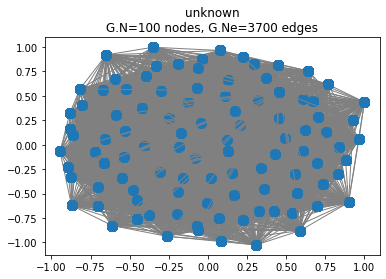

In [6]:
A = createG(100,1)
degree = np.sum(A, axis = 0)
#print(degree)
D = createD(100,degree)
L = D - A
I = np.identity(100)
G = graphs.Graph(A)
#print(A)
#print(D)
#print(L)
G.set_coordinates()
print('{} nodes, {} edges'.format(G.N, G.Ne))
print(G.is_connected())

# Test Polynomials of degree 3 for L + I
p1 = I + L + np.dot(L,L) + np.dot(L,np.dot(L,L))
print("p1 is : ",checkI(p1))
p2 = I - L - np.dot(L,L) - np.dot(L,np.dot(L,L))
print("p2 is : ",checkI(p2))
p3 = I + 7*L - 4*np.dot(L,L) + 12*np.dot(L,np.dot(L,L))
print("p3 is : ",checkI(p3))
p4 = I + 100*np.dot(L,np.dot(L,L)) - 452 * L + np.dot(L,L)
print("p4 is : ",checkI(p4))
p5 = I - L
print("p5 is : ",checkI(p5))
p6 = I + L
print("p6 is : ",checkI(p6))
p7 = -2 * I + np.dot(np.dot(L,L),L) + 3 * np.dot(L,L)
print("p7 is : ",checkI(p7))
p8 = -2 * I + np.dot(np.dot(L,L),L) - 3 * np.dot(L,L)
print("p8 is : ",checkI(p8))
p9 = -I + np.dot(L,L)
print("p9 is : ",checkI(p9))
p10 = I + np.dot(L,L)
print("p10 is : ",checkI(p10))

pygsp.plotting.plot_graph(G)

In [7]:
# Test a bunch of graphs...
q = 0
while q < 10000:
    A = createG(100,1)
    degree = np.sum(A, axis = 0)
    #print(degree)
    D = createD(100,degree)
    L = D - A
    I = np.identity(100)
    G = graphs.Graph(A)
    # Test Polynomials of degree 3 for L + I
    p1 = I + L + np.dot(L,L) + np.dot(L,np.dot(L,L))
    p2 = I - L - np.dot(L,L) - np.dot(L,np.dot(L,L))
    p3 = I + 7*L - 4*np.dot(L,L) + 12*np.dot(L,np.dot(L,L))
    p4 = I + 100*np.dot(L,np.dot(L,L)) - 452 * L + np.dot(L,L)
    p5 = I - L
    p6 = I + L
    p7 = -2 * I + np.dot(np.dot(L,L),L) + 3 * np.dot(L,L)
    p8 = -2 * I + np.dot(np.dot(L,L),L) - 3 * np.dot(L,L)
    p9 = -I + np.dot(L,L)
    p10 = I + np.dot(L,L)
    p = [p1,p2,p3,p4,p5,p6,p7,p8,p9,p10]
    for i in range(0,len(p)):
        if(checkI(p[i]) == "Singular"):
            print("Singular Matrix Found")
            q = 10000000
    q += 1

C:\Users\jkill\Anaconda3\envs\cs548sp\lib\site-packages\numpy\linalg\linalg.py:2158: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


In [8]:
fT = 0
gT = 0
nI = 0
i = 0
j = 0

#checking a bunch of adjacency matrices, f worked about 95%, g worked for every one
for i in range(2,200):
    for j in range(0,1000):
        a=0
        b=0
        W = createG(i,j)
        a,b = checkI_1(W,I,i)
        fT += a
        gT += b
print(fT,gT,nI)

190724 198000 0


# Filter Examples with PyGSP
Filters are present in this notebook along with filters.py

## Setting up the initial graphs  (Figures 2,3,15)

In [9]:
plotting.BACKEND = 'matplotlib'
plt.rcParams['figure.figsize'] = (10, 5)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


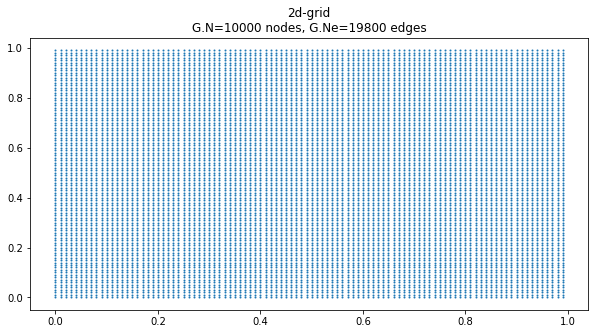

In [10]:
G = graphs.Grid2d(100,100)
G.plot(vertex_size = 1)

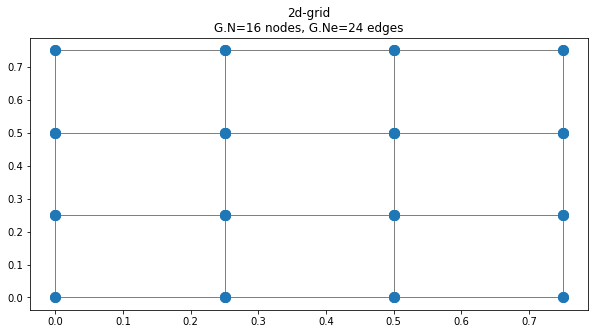

In [11]:
G1 = graphs.Grid2d(4,4)
G1.plot()

In [12]:
G.compute_fourier_basis()

2022-11-20 19:18:35,143:[WARNING](pygsp.graphs.graph.compute_fourier_basis): Computing the full eigendecomposition of a large matrix (10000 x 10000) may take some time.


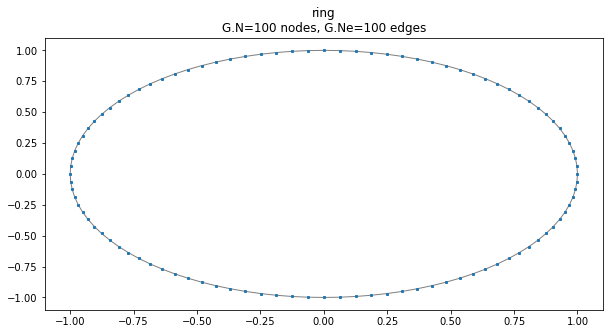

In [13]:
R = graphs.Ring(100,1)
R.plot(vertex_size = 20)

In [14]:
R.compute_fourier_basis()

---------------------------
## Low Pass Filters
---------------------------

## FFR for LP_1 on the Grid Graph (Figure 4)

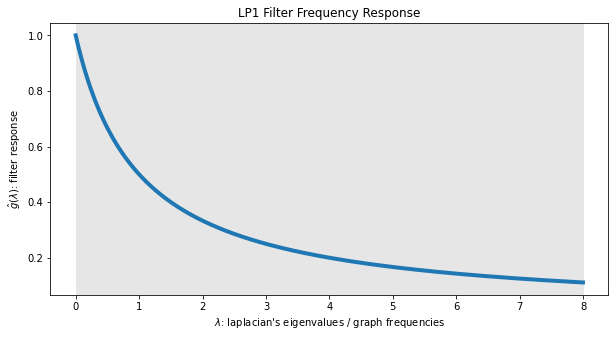

In [15]:
# Low pass filter that was defined in the PyGSP documentation
def lp1(x):
    tau = 1
    return 1. / (1. + tau * x)

lp1 = filters.Filter(G, lp1)
fig, ax = plt.subplots()
lp1.plot(plot_eigenvalues=True, ax=ax)
_ = ax.set_title('LP1 Filter Frequency Response')

## Applying LP_1 to noisy data (Figure 5)

In [16]:
# random state is set to a constant so results are reproducable
rs = np.random.RandomState(10)
s = np.zeros(G.N)
a = int(len(s)/9)
for i in range(0,len(s)):
    if(i < a):
        s[i] = -4
    if(i >= a and i < 2*a):
        s[i] = -3
    if(i >= 2*a and i < 3*a):
        s[i] = -2
    if(i >= 3*a and i < 4*a):
        s[i] = -1
    if(i >= 4*a and i < 5*a):
        s[i] = 0
    if(i >= 5*a and i < 6*a):
        s[i] = 1
    if(i >= 6*a and i < 7*a):
        s[i] = 2
    if(i >= 7*a and i < 8*a):
        s[i] = 3
    if(i >= 8*a):
        s[i] = 4

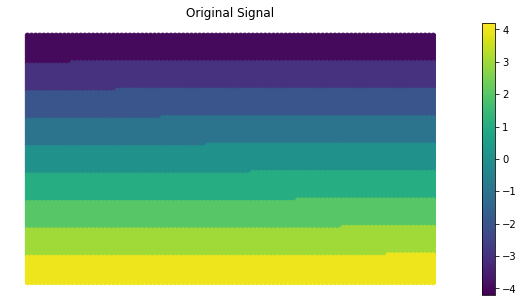

In [17]:
# Original Signal
fig, axes = plt.subplots()
G.plot_signal(s, vertex_size=20, ax=axes)
_ = axes.set_title('Original Signal')
axes.set_axis_off()

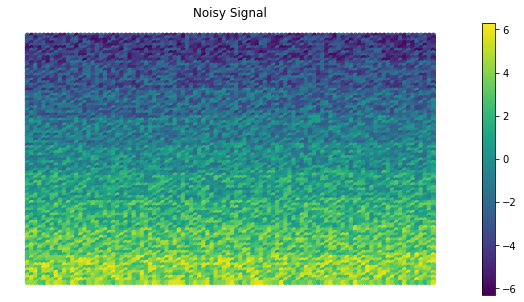

In [18]:
# Noise added to the signal
s += rs.uniform(-2, 2, size=G.N)
fig, axes = plt.subplots()
G.plot_signal(s, vertex_size=20, ax=axes)
_ = axes.set_title('Noisy Signal')
axes.set_axis_off()

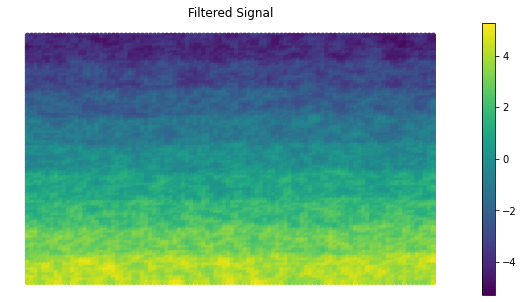

In [19]:
# Filtered Signal
s2 = lp1.filter(s)
fig, axes = plt.subplots()
G.plot_signal(s2, vertex_size=20, ax=axes)
_ = axes.set_title('Filtered Signal')
axes.set_axis_off()

## FFR for LP_2 on the Grid Graph (Figure 6)

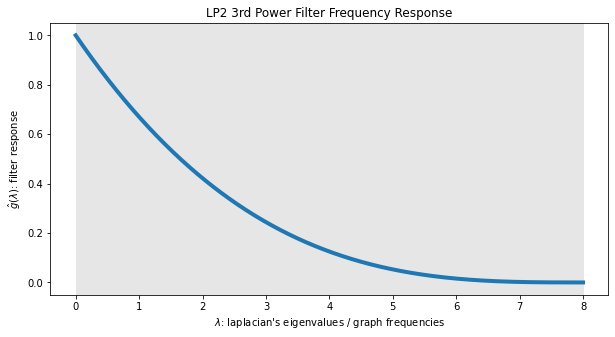

In [20]:
# Low pass filter that uses a negative cubic function, suggested parameters
# are a = 1, and b = 1/(G.lmax) where G.lmax is the max eigenvalue for the graph
def lp2(x):
    a = 1
    b = 0.125
    n = 1
    return((a - (b*x))**(2*n + 1))

lp2 = filters.Filter(G, lp2)
fig, ax = plt.subplots()
lp2.plot(plot_eigenvalues=True, ax=ax)
_ = ax.set_title('LP2 3rd Power Filter Frequency Response')

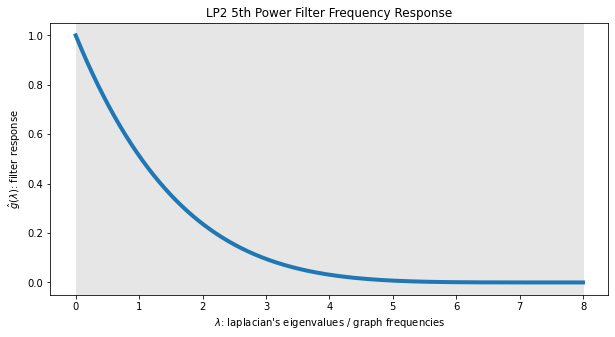

In [21]:
#Parameters for the fifth power
def lp2_5(x):
    a = 1
    b = 0.125
    n = 2
    return((a - (b*x))**(2*n + 1))

lp2_5 = filters.Filter(G, lp2_5)
fig, ax = plt.subplots()
lp2_5.plot(plot_eigenvalues=True, ax=ax)
_ = ax.set_title('LP2 5th Power Filter Frequency Response')

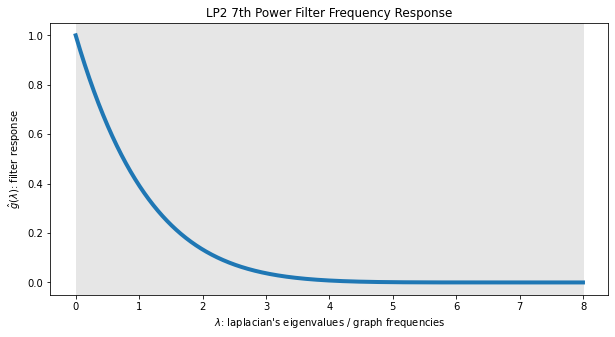

In [22]:
#Parameters for the seventh power
def lp2_7(x):
    a = 1
    b = 0.125
    n = 3
    return((a - (b*x))**(2*n + 1))

lp2_7 = filters.Filter(G, lp2_7)
fig, ax = plt.subplots()
lp2_7.plot(plot_eigenvalues=True, ax=ax)
_ = ax.set_title('LP2 7th Power Filter Frequency Response')

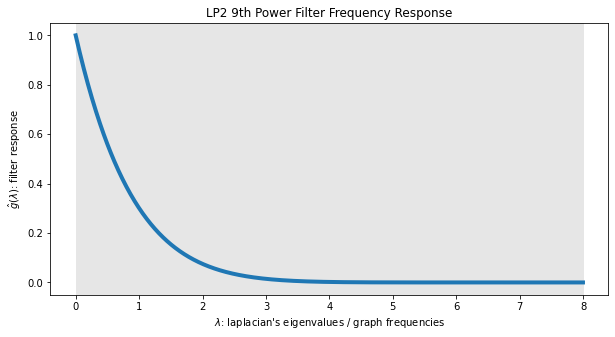

In [23]:
#Parameters for the ninth power
def lp2_9(x):
    a = 1
    b = 0.125
    n = 4
    return((a - (b*x))**(2*n + 1))

lp2_9 = filters.Filter(G, lp2_9)
fig, ax = plt.subplots()
lp2_9.plot(plot_eigenvalues=True, ax=ax)
_ = ax.set_title('LP2 9th Power Filter Frequency Response')

## LP_2 applied to noisy data (Figure 7)

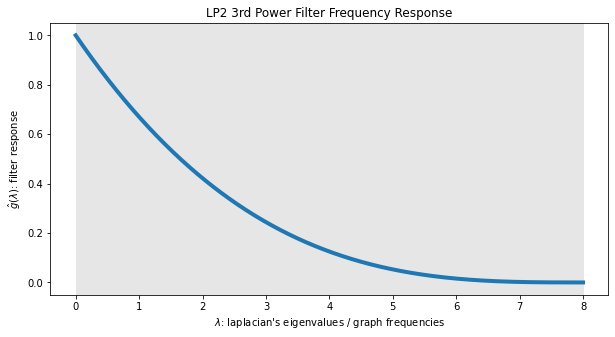

In [24]:
def lp2(x):
    a = 1
    b = 0.125
    n = 1
    return((a - (b*x))**(2*n + 1))

lp2 = filters.Filter(G, lp2)
fig, ax = plt.subplots()
lp2.plot(plot_eigenvalues=True, ax=ax)
_ = ax.set_title('LP2 3rd Power Filter Frequency Response')

In [25]:
# random state is set to a constant so results are reproducable
rs = np.random.RandomState(10)
s = np.zeros(G.N)
a = int(len(s)/9)
for i in range(0,len(s)):
    if(i < a):
        s[i] = -4
    if(i >= a and i < 2*a):
        s[i] = -3
    if(i >= 2*a and i < 3*a):
        s[i] = -2
    if(i >= 3*a and i < 4*a):
        s[i] = -1
    if(i >= 4*a and i < 5*a):
        s[i] = 0
    if(i >= 5*a and i < 6*a):
        s[i] = 1
    if(i >= 6*a and i < 7*a):
        s[i] = 2
    if(i >= 7*a and i < 8*a):
        s[i] = 3
    if(i >= 8*a):
        s[i] = 4

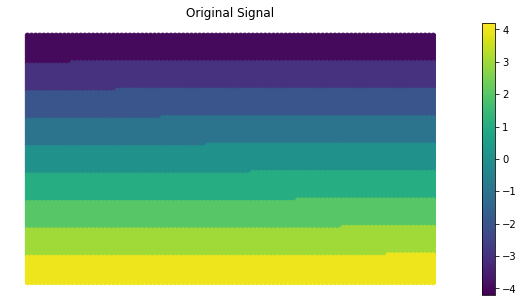

In [26]:
# Original Signal
fig, axes = plt.subplots()
G.plot_signal(s, vertex_size=20, ax=axes)
_ = axes.set_title('Original Signal')
axes.set_axis_off()

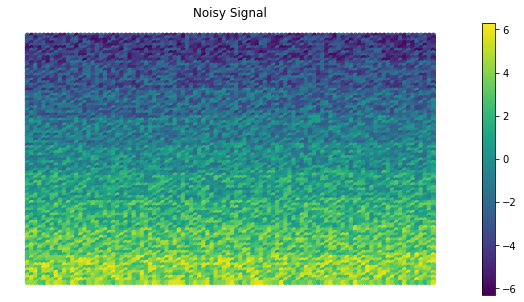

In [27]:
# Noise added to the signal
s += rs.uniform(-2, 2, size=G.N)
fig, axes = plt.subplots()
G.plot_signal(s, vertex_size=20, ax=axes)
_ = axes.set_title('Noisy Signal')
axes.set_axis_off()

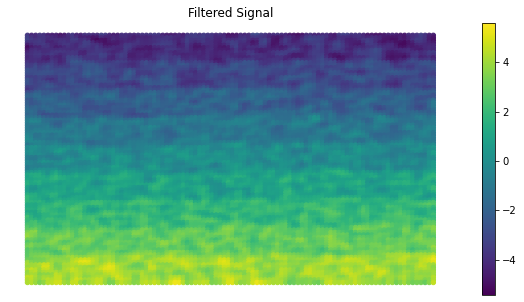

In [28]:
# Filtered Signal
s2 = lp2.filter(s)
fig, axes = plt.subplots()
G.plot_signal(s2, vertex_size=20, ax=axes)
_ = axes.set_title('Filtered Signal')
axes.set_axis_off()

## LP_3 FFR on the Grid Graph + Application (Figure 8 + 9)

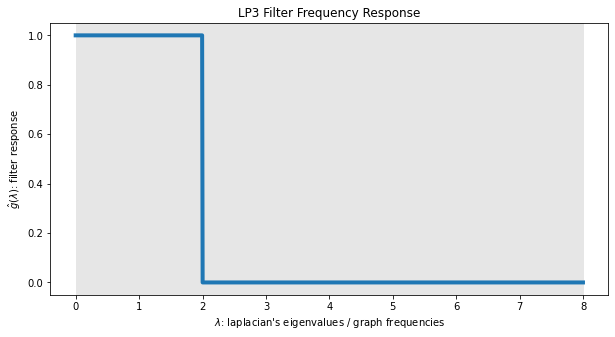

In [29]:
# Trivial low pass filter, keeps frequenccies below a certain cutoff point
def lp3(x):
    q = 2
    y = np.zeros(len(x))
    for i in range(len(x)):
        if(x[i] < q):
            y[i] = 1
        else:
            y[i] = 0
    return(y)

lp3 = filters.Filter(G, lp3)
fig, ax = plt.subplots()
lp3.plot(plot_eigenvalues=True, ax=ax)
_ = ax.set_title('LP3 Filter Frequency Response')

In [30]:
# random state is set to a constant so results are reproducable
rs = np.random.RandomState(10)
s = np.zeros(G.N)
a = int(len(s)/9)
for i in range(0,len(s)):
    if(i < a):
        s[i] = -4
    if(i >= a and i < 2*a):
        s[i] = -3
    if(i >= 2*a and i < 3*a):
        s[i] = -2
    if(i >= 3*a and i < 4*a):
        s[i] = -1
    if(i >= 4*a and i < 5*a):
        s[i] = 0
    if(i >= 5*a and i < 6*a):
        s[i] = 1
    if(i >= 6*a and i < 7*a):
        s[i] = 2
    if(i >= 7*a and i < 8*a):
        s[i] = 3
    if(i >= 8*a):
        s[i] = 4

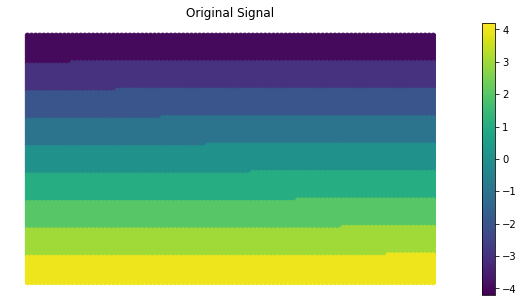

In [31]:
# Original Signal
fig, axes = plt.subplots()
G.plot_signal(s, vertex_size=20, ax=axes)
_ = axes.set_title('Original Signal')
axes.set_axis_off()

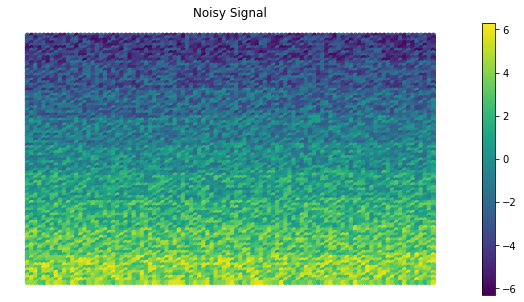

In [32]:
# Noise added to the signal
s += rs.uniform(-2, 2, size=G.N)
fig, axes = plt.subplots()
G.plot_signal(s, vertex_size=20, ax=axes)
_ = axes.set_title('Noisy Signal')
axes.set_axis_off()

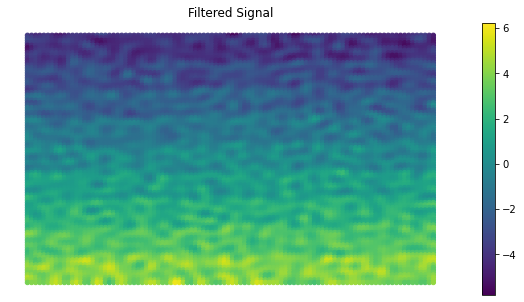

In [33]:
# Filtered Signal
s2 = lp3.filter(s)
fig, axes = plt.subplots()
G.plot_signal(s2, vertex_size=20, ax=axes)
_ = axes.set_title('Filtered Signal')
axes.set_axis_off()

---------------------------
## High Pass Filters
---------------------------

## HP_1 FFR on Grid Graph + Application (Figure 10)

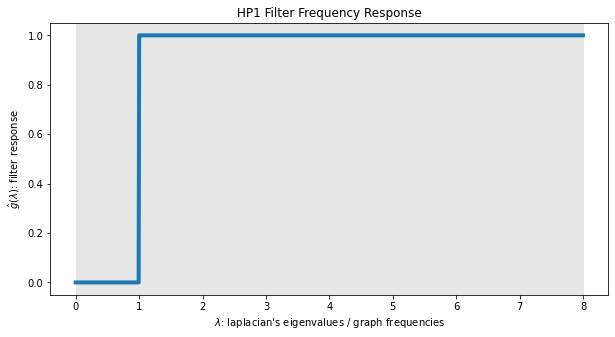

In [34]:
# Trivial high pass filter, keeps frequencies above a certain cutoff point
def hp1(x):
    q = 1
    y = np.zeros(len(x))
    for i in range(len(x)):
        if(x[i] < q):
            y[i] = 0
        else:
            y[i] = 1
    return(y)

hp1 = filters.Filter(G, hp1)
fig, ax = plt.subplots()
hp1.plot(plot_eigenvalues=True, ax=ax)
_ = ax.set_title('HP1 Filter Frequency Response')

In [35]:
# random state is set to a constant so results are reproducable
rs = np.random.RandomState(10)
s = np.zeros(G.N)
a = int(len(s)/9)
for i in range(0,len(s)):
    if(i < a):
        s[i] = -4
    if(i >= a and i < 2*a):
        s[i] = -3
    if(i >= 2*a and i < 3*a):
        s[i] = -2
    if(i >= 3*a and i < 4*a):
        s[i] = -1
    if(i >= 4*a and i < 5*a):
        s[i] = 0
    if(i >= 5*a and i < 6*a):
        s[i] = 1
    if(i >= 6*a and i < 7*a):
        s[i] = 2
    if(i >= 7*a and i < 8*a):
        s[i] = 3
    if(i >= 8*a):
        s[i] = 4

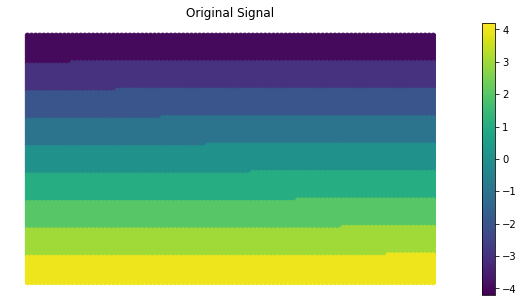

In [36]:
# Original Signal
fig, axes = plt.subplots()
G.plot_signal(s, vertex_size=20, ax=axes)
_ = axes.set_title('Original Signal')
axes.set_axis_off()

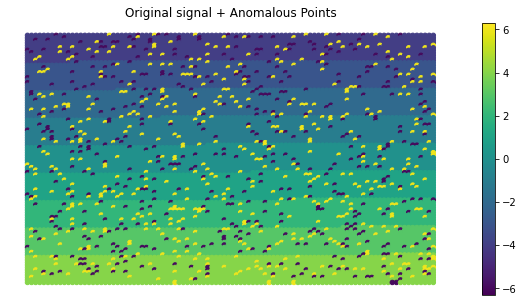

In [37]:
random.seed(10)
for i in range(0,len(s)):
    k = random.randint(1,20)
    if(k == 5):
        s[i] = 6
    if(k == 15):
        s[i] = -6

fig, axes = plt.subplots()
G.plot_signal(s, vertex_size=20, ax=axes)
_ = axes.set_title('Original signal + Anomalous Points')
axes.set_axis_off()

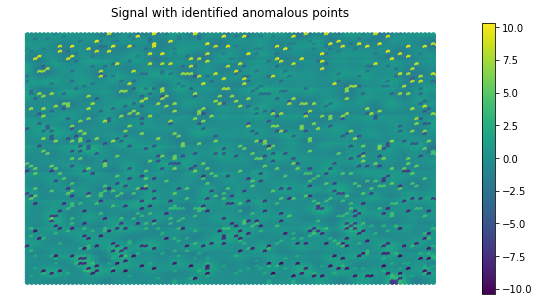

In [38]:
s2 = hp1.filter(s)
fig, axes = plt.subplots()
G.plot_signal(s2, vertex_size=20, ax=axes)
_ = axes.set_title('Signal with identified anomalous points')
axes.set_axis_off()

## HP_2 FFR on Grid Graph + Application (Figure 11 + 12)

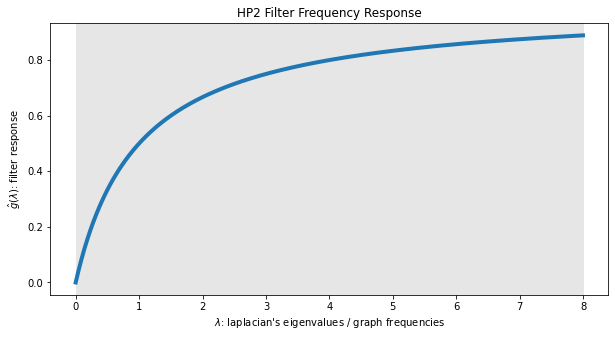

In [39]:
# Smoother high pass filter, it is the negation of the PyGSP filter shifted up by 1
def hp2(x):
    tau = 1
    return((-1. / (1. + tau * x)) + 1)

hp2 = filters.Filter(G, hp2)
fig, ax = plt.subplots()
hp2.plot(plot_eigenvalues=True, ax=ax)
_ = ax.set_title('HP2 Filter Frequency Response')

In [40]:
# random state is set to a constant so results are reproducable
rs = np.random.RandomState(10)
s = np.zeros(G.N)
a = int(len(s)/9)
for i in range(0,len(s)):
    if(i < a):
        s[i] = -4
    if(i >= a and i < 2*a):
        s[i] = -3
    if(i >= 2*a and i < 3*a):
        s[i] = -2
    if(i >= 3*a and i < 4*a):
        s[i] = -1
    if(i >= 4*a and i < 5*a):
        s[i] = 0
    if(i >= 5*a and i < 6*a):
        s[i] = 1
    if(i >= 6*a and i < 7*a):
        s[i] = 2
    if(i >= 7*a and i < 8*a):
        s[i] = 3
    if(i >= 8*a):
        s[i] = 4

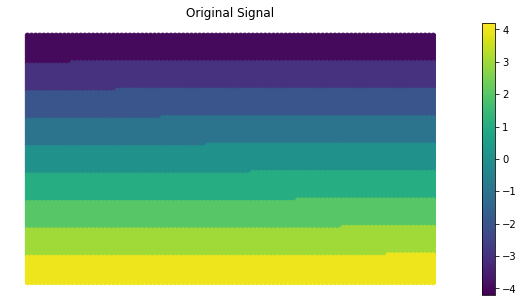

In [41]:
# Original Signal
fig, axes = plt.subplots()
G.plot_signal(s, vertex_size=20, ax=axes)
_ = axes.set_title('Original Signal')
axes.set_axis_off()

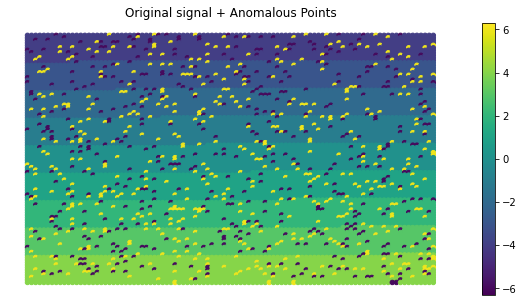

In [42]:
random.seed(10)
for i in range(0,len(s)):
    k = random.randint(1,20)
    if(k == 5):
        s[i] = 6
    if(k == 15):
        s[i] = -6

fig, axes = plt.subplots()
G.plot_signal(s, vertex_size=20, ax=axes)
_ = axes.set_title('Original signal + Anomalous Points')
axes.set_axis_off()

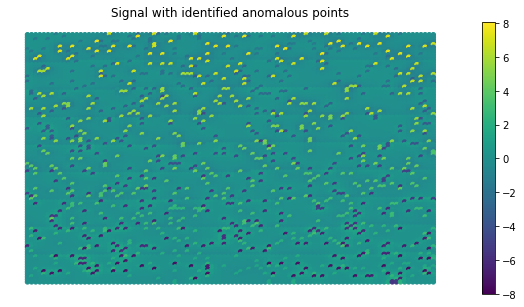

In [43]:
s2 = hp2.filter(s)
fig, axes = plt.subplots()
G.plot_signal(s2, vertex_size=20, ax=axes)
_ = axes.set_title('Signal with identified anomalous points')
axes.set_axis_off()

## HP_3 FFR on Grid Graph + Application (Figure 13 + 14)

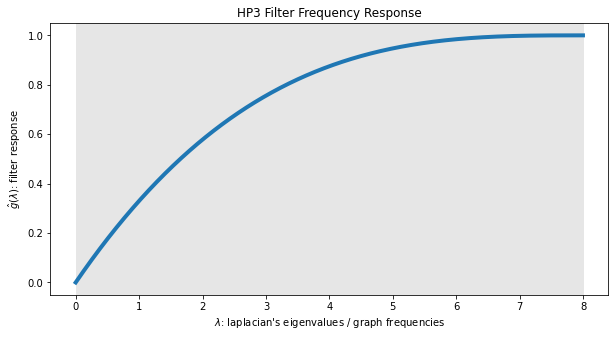

In [44]:
# Negation of the lp2 filter and shifted upwards by 1. The parameters here are still
# the same, a = 1, and b = 1/(G.lmax) where G.lmax is the max eigenvalue for the graph
def hp3(x):
    a = 1
    b = 0.125
    return(-(a - (b*x))**3 + 1)

hp3 = filters.Filter(G, hp3)
fig, ax = plt.subplots()
hp3.plot(plot_eigenvalues=True, ax=ax)
_ = ax.set_title('HP3 Filter Frequency Response')

In [45]:
# random state is set to a constant so results are reproducable
rs = np.random.RandomState(10)
s = np.zeros(G.N)
a = int(len(s)/9)
for i in range(0,len(s)):
    if(i < a):
        s[i] = -4
    if(i >= a and i < 2*a):
        s[i] = -3
    if(i >= 2*a and i < 3*a):
        s[i] = -2
    if(i >= 3*a and i < 4*a):
        s[i] = -1
    if(i >= 4*a and i < 5*a):
        s[i] = 0
    if(i >= 5*a and i < 6*a):
        s[i] = 1
    if(i >= 6*a and i < 7*a):
        s[i] = 2
    if(i >= 7*a and i < 8*a):
        s[i] = 3
    if(i >= 8*a):
        s[i] = 4

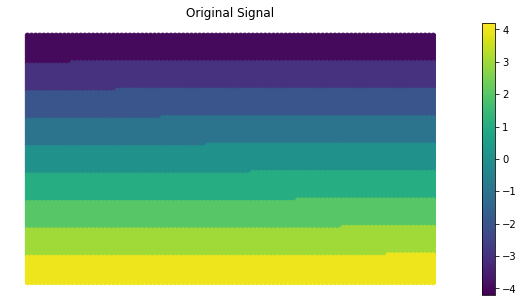

In [46]:
# Original Signal
fig, axes = plt.subplots()
G.plot_signal(s, vertex_size=20, ax=axes)
_ = axes.set_title('Original Signal')
axes.set_axis_off()

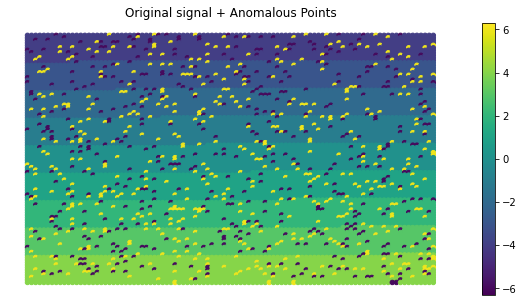

In [47]:
random.seed(10)
for i in range(0,len(s)):
    k = random.randint(1,20)
    if(k == 5):
        s[i] = 6
    if(k == 15):
        s[i] = -6

fig, axes = plt.subplots()
G.plot_signal(s, vertex_size=20, ax=axes)
_ = axes.set_title('Original signal + Anomalous Points')
axes.set_axis_off()

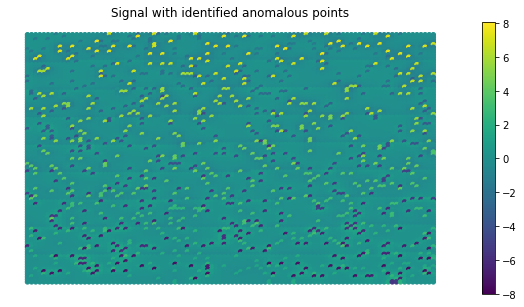

In [48]:
s2 = hp2.filter(s)
fig, axes = plt.subplots()
G.plot_signal(s2, vertex_size=20, ax=axes)
_ = axes.set_title('Signal with identified anomalous points')
axes.set_axis_off()

------------------------
## Rational Filters
------------------------

## RL + RH FFR on the Ring Graph (Figure 16)

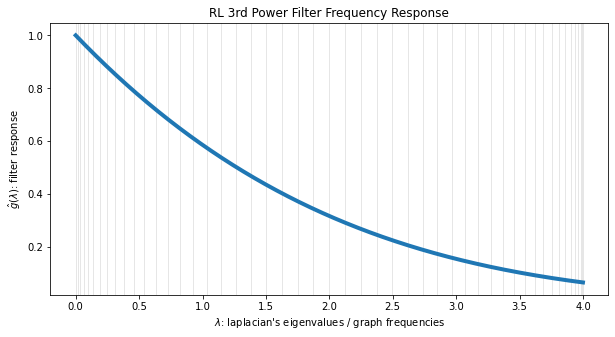

In [49]:
# Rational low pass filter that was proposed by this thesis
def rl(x):
    a = 1
    b = 0.125
    return(((a - (b*x))**3) / ((1 + b*x) + (b**2 * x**2) + (b**3 * x**3)))

rl = filters.Filter(R, rl)
fig, ax = plt.subplots()
rl.plot(plot_eigenvalues=True, ax=ax)
_ = ax.set_title('RL 3rd Power Filter Frequency Response')

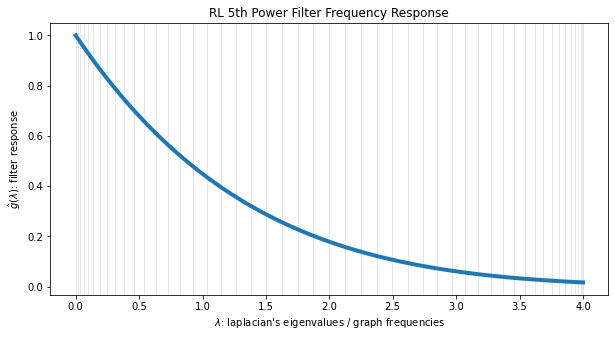

In [50]:
def rl_5(x):
    a = 1
    b = 0.125
    return(((a - (b*x))**5) / ((1 + b*x) + (b**2 * x**2) + (b**3 * x**3)))

rl_5 = filters.Filter(R, rl_5)
fig, ax = plt.subplots()
rl_5.plot(plot_eigenvalues=True, ax=ax)
_ = ax.set_title('RL 5th Power Filter Frequency Response')

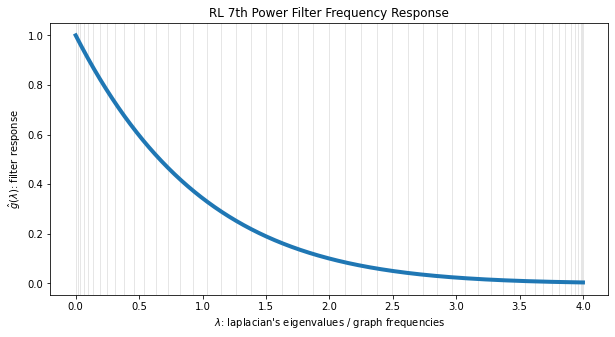

In [51]:
def rl_7(x):
    a = 1
    b = 0.125
    return(((a - (b*x))**7) / ((1 + b*x) + (b**2 * x**2) + (b**3 * x**3)))

rl_7 = filters.Filter(R, rl_7)
fig, ax = plt.subplots()
rl_7.plot(plot_eigenvalues=True, ax=ax)
_ = ax.set_title('RL 7th Power Filter Frequency Response')

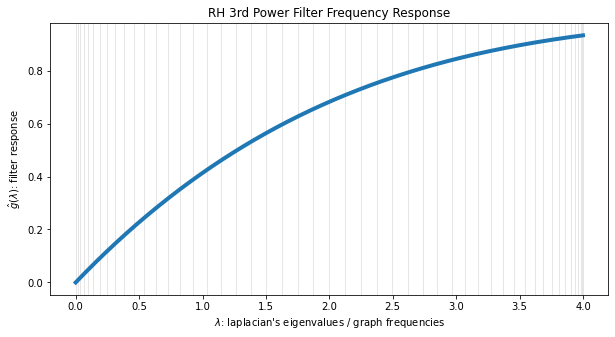

In [52]:
# Rational high pass filter that as proposed by this thesis
def rh(x):
    a = 1
    b = 0.125
    return((-(a - (b*x))**3) / ((1 + b*x) + (b**2 * x**2) + (b**3 * x**3)) + 1)

rh = filters.Filter(R, rh)
fig, ax = plt.subplots()
rh.plot(plot_eigenvalues=True, ax=ax)
_ = ax.set_title('RH 3rd Power Filter Frequency Response')

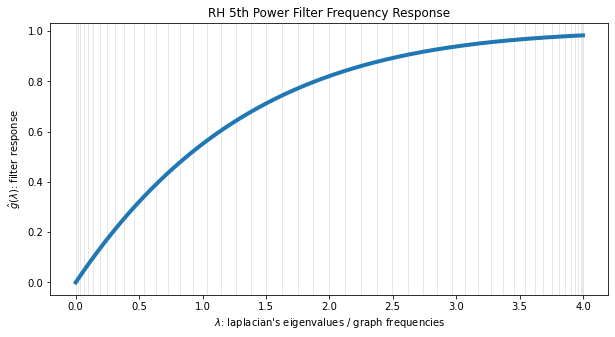

In [53]:
def rh_5(x):
    a = 1
    b = 0.125
    return((-(a - (b*x))**5) / ((1 + b*x) + (b**2 * x**2) + (b**3 * x**3)) + 1)

rh_5 = filters.Filter(R, rh_5)
fig, ax = plt.subplots()
rh_5.plot(plot_eigenvalues=True, ax=ax)
_ = ax.set_title('RH 5th Power Filter Frequency Response')

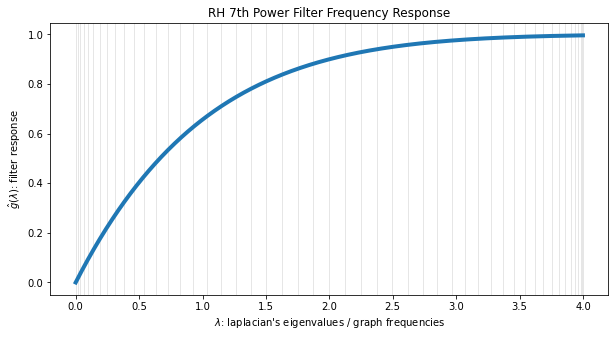

In [54]:
def rh_7(x):
    a = 1
    b = 0.125
    return((-(a - (b*x))**7) / ((1 + b*x) + (b**2 * x**2) + (b**3 * x**3)) + 1)

rh_7 = filters.Filter(R, rh_7)
fig, ax = plt.subplots()
rh_7.plot(plot_eigenvalues=True, ax=ax)
_ = ax.set_title('RH 7th Power Filter Frequency Response')

## Application of RL on the Ring Graph (Figure 17)

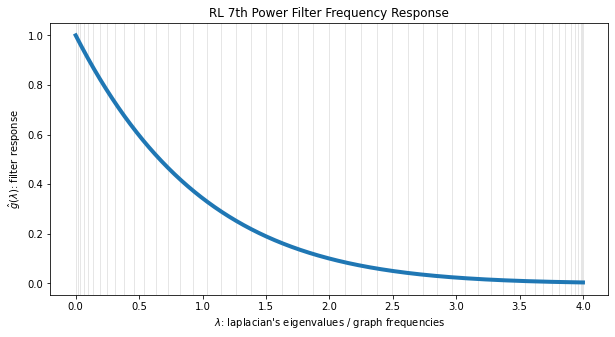

In [55]:
def rl_7(x):
    a = 1
    b = 0.125
    return(((a - (b*x))**7) / ((1 + b*x) + (b**2 * x**2) + (b**3 * x**3)))

rl_7 = filters.Filter(R, rl_7)
fig, ax = plt.subplots()
rl_7.plot(plot_eigenvalues=True, ax=ax)
_ = ax.set_title('RL 7th Power Filter Frequency Response')

In [56]:
# So that the results can be reproduced
rs = np.random.RandomState(10)
r = np.zeros(R.N)
for i in range(0,100):
    if(i < 10):
        r[i] = 0
    if(i >= 10 and i < 20):
        r[i] = 1
    if(i >= 20 and i < 30):
        r[i] = 2
    if(i >= 30 and i < 40):
        r[i] = 3
    if(i >= 40 and i < 50):
        r[i] = 4
    if(i >= 50 and i < 60):
        r[i] = 5
    if(i >= 60 and i < 70):
        r[i] = 4
    if(i >= 70 and i < 80):
        r[i] = 3
    if(i >= 80 and i < 90):
        r[i] = 2
    if(i >= 90 and i < 100):
        r[i] = 1

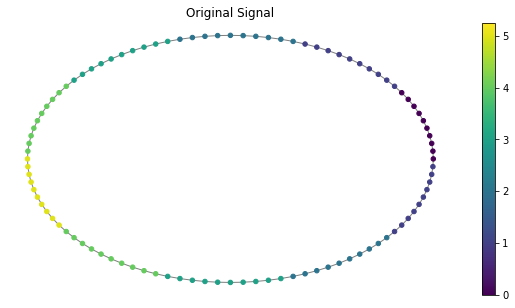

In [57]:
fig, axes = plt.subplots()
R.plot_signal(r, vertex_size=20, ax=axes)
_ = axes.set_title('Original Signal')
axes.set_axis_off()

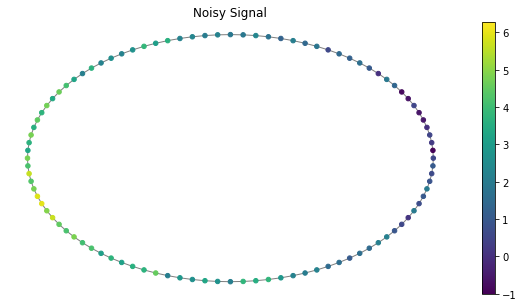

In [58]:
# Noise added to the signal
r += rs.uniform(-1, 1, size=R.N)
fig, axes = plt.subplots()
R.plot_signal(r, vertex_size=20, ax=axes)
_ = axes.set_title('Noisy Signal')
axes.set_axis_off()

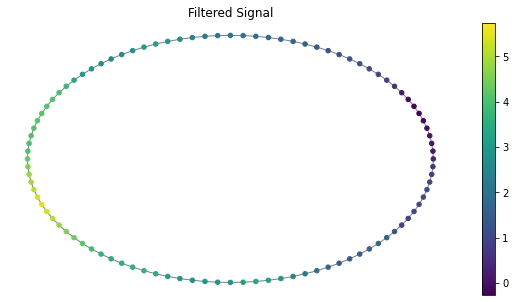

In [59]:
r2 = rl_7.filter(r)
fig, axes = plt.subplots()
R.plot_signal(r2, vertex_size=20, ax=axes)
_ = axes.set_title('Filtered Signal')
axes.set_axis_off()

## Application of RH on the Ring Graph (Figure 18)

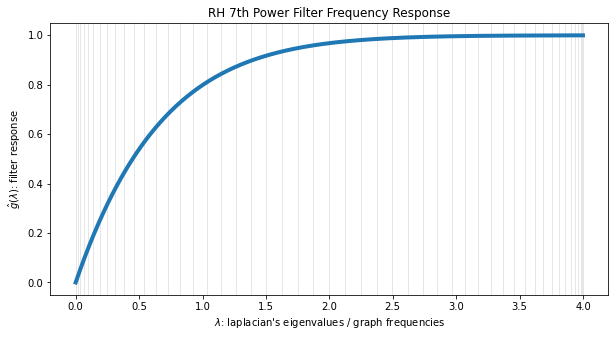

In [60]:
def rh_7(x):
    a = 1
    b = 0.125
    return((-(a - (b*x))**11) / ((1 + b*x) + (b**2 * x**2) + (b**3 * x**3)) + 1)

rh_7 = filters.Filter(R, rh_7)
fig, ax = plt.subplots()
rh_7.plot(plot_eigenvalues=True, ax=ax)
_ = ax.set_title('RH 7th Power Filter Frequency Response')

In [61]:
# So that the results can be reproduced
rs = np.random.RandomState(10)
r = np.zeros(R.N)
for i in range(0,100):
    if(i < 10):
        r[i] = 0
    if(i >= 10 and i < 20):
        r[i] = 1
    if(i >= 20 and i < 30):
        r[i] = 2
    if(i >= 30 and i < 40):
        r[i] = 3
    if(i >= 40 and i < 50):
        r[i] = 4
    if(i >= 50 and i < 60):
        r[i] = 5
    if(i >= 60 and i < 70):
        r[i] = 4
    if(i >= 70 and i < 80):
        r[i] = 3
    if(i >= 80 and i < 90):
        r[i] = 2
    if(i >= 90 and i < 100):
        r[i] = 1

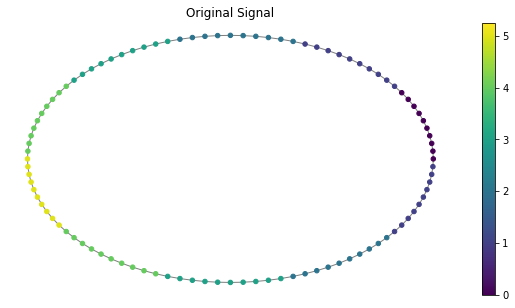

In [62]:
fig, axes = plt.subplots()
R.plot_signal(r, vertex_size=20, ax=axes)
_ = axes.set_title('Original Signal')
axes.set_axis_off()

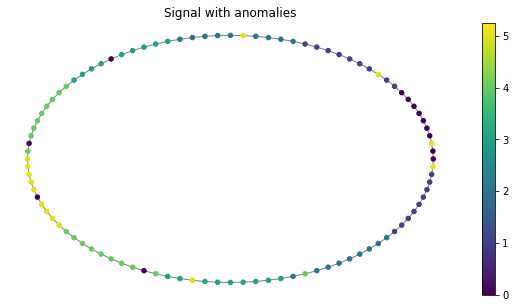

In [63]:
r[2] = 5
r[48] = 0
r[12] = 5
r[24] = 5
r[35] = 0
r[55] = 0
r[68] = 0
r[72] = 5
r[81] = 4
r[99] = 5
fig, axes = plt.subplots()
R.plot_signal(r, vertex_size=20, ax=axes)
_ = axes.set_title('Signal with anomalies')
axes.set_axis_off()

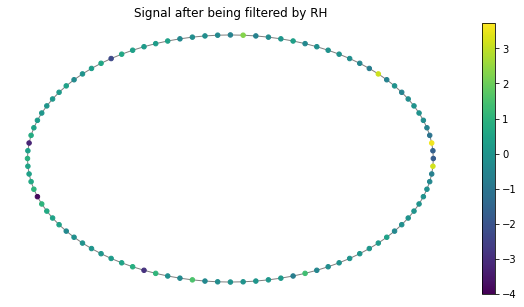

In [64]:
r2 = rh_7.filter(r)
fig, axes = plt.subplots()
R.plot_signal(r2, vertex_size=20, ax=axes)
_ = axes.set_title('Signal after being filtered by RH')
axes.set_axis_off()

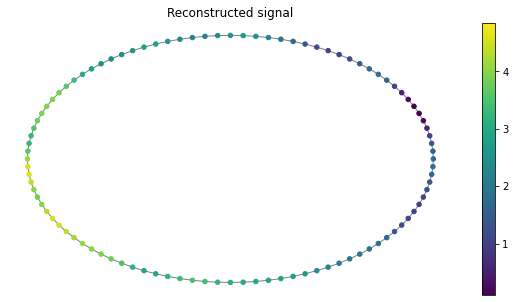

In [65]:
r3 = r - r2
fig, axes = plt.subplots()
R.plot_signal(r3, vertex_size=20, ax=axes)
_ = axes.set_title('Reconstructed signal')
axes.set_axis_off()

## Figure 19 FFR for TB_1 and TB_2 applied to the Grid Graph

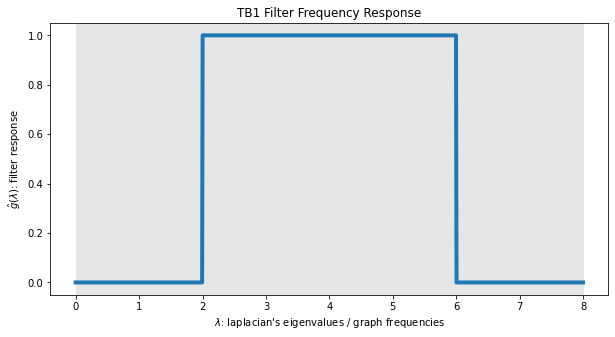

In [66]:
center = G.lmax/2
a = center/(G.lmax*2)
def tb1(x):
    y = np.zeros(len(x))
    for i in range(0,len(x)):
        if((x[i] < (center/2)) or (x[i] > (center + (center/2)))):
            y[i] = 0
        else:
            y[i] = 1
    return(y)

tb1 = filters.Filter(G, tb1)
fig, ax = plt.subplots()
tb1.plot(plot_eigenvalues=True, ax=ax)
_ = ax.set_title('TB1 Filter Frequency Response')

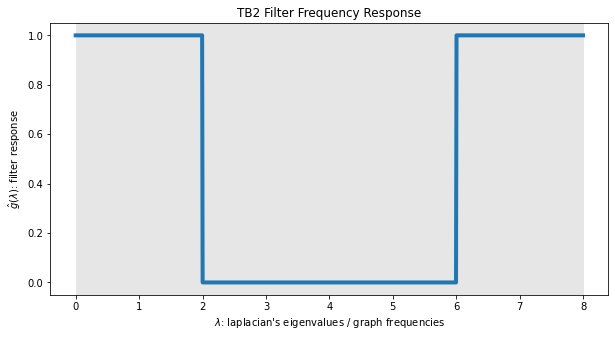

In [67]:
center = G.lmax/2
a = center/(G.lmax*2)
def tb2(x):
    y = np.zeros(len(x))
    for i in range(0,len(x)):
        if((x[i] < (center/2)) or (x[i] > (center + (center/2)))):
            y[i] = 1
        else:
            y[i] = 0
    return(y)

tb2 = filters.Filter(G, tb2)
fig, ax = plt.subplots()
tb2.plot(plot_eigenvalues=True, ax=ax)
_ = ax.set_title('TB2 Filter Frequency Response')

## TB2 application on the Grid Graph (Figure 20)

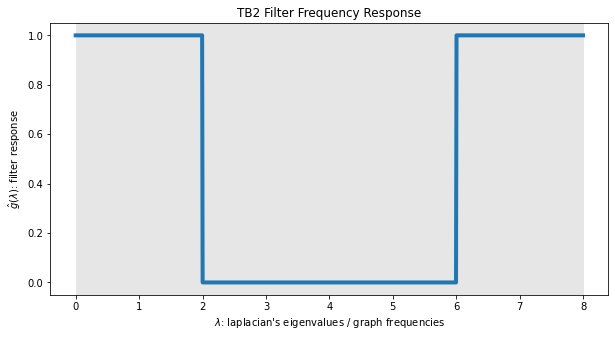

In [68]:
center = G.lmax/2
a = center/(G.lmax*2)
def tb2(x):
    y = np.zeros(len(x))
    for i in range(0,len(x)):
        if((x[i] < (center/2)) or (x[i] > (center + (center/2)))):
            y[i] = 1
        else:
            y[i] = 0
    return(y)

tb2 = filters.Filter(G, tb2)
fig, ax = plt.subplots()
tb2.plot(plot_eigenvalues=True, ax=ax)
_ = ax.set_title('TB2 Filter Frequency Response')

In [69]:
# random state is set to a constant so results are reproducable
rs = np.random.RandomState(10)
s = np.zeros(G.N)
a = int(len(s)/9)
for i in range(0,len(s)):
    if(i < a):
        s[i] = -4
    if(i >= a and i < 2*a):
        s[i] = -3
    if(i >= 2*a and i < 3*a):
        s[i] = -2
    if(i >= 3*a and i < 4*a):
        s[i] = -1
    if(i >= 4*a and i < 5*a):
        s[i] = 0
    if(i >= 5*a and i < 6*a):
        s[i] = 1
    if(i >= 6*a and i < 7*a):
        s[i] = 2
    if(i >= 7*a and i < 8*a):
        s[i] = 3
    if(i >= 8*a):
        s[i] = 4

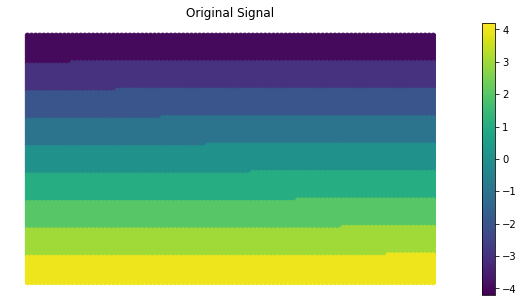

In [70]:
# Original Signal
fig, axes = plt.subplots()
G.plot_signal(s, vertex_size=20, ax=axes)
_ = axes.set_title('Original Signal')
axes.set_axis_off()

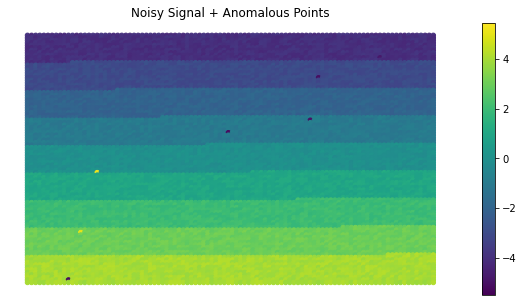

In [71]:
random.seed(10)
for i in range(0,len(s)):
    k = random.randint(1,2000)
    if(k == 5):
        s[i] = 5
    if(k == 15):
        s[i] = -5

s+= rs.uniform(-0.25, 0.25, size=G.N)
fig, axes = plt.subplots()
G.plot_signal(s, vertex_size=20, ax=axes)
_ = axes.set_title('Noisy Signal + Anomalous Points')
axes.set_axis_off()

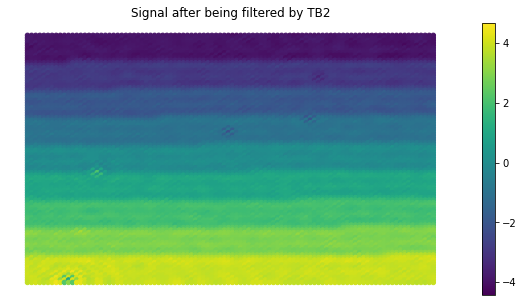

In [72]:
s2 = tb2.filter(s)
fig, axes = plt.subplots()
G.plot_signal(s2, vertex_size=20, ax=axes)
_ = axes.set_title('Signal after being filtered by TB2')
axes.set_axis_off()

## Application of TB1 on the Grid Graph (Figure 21)

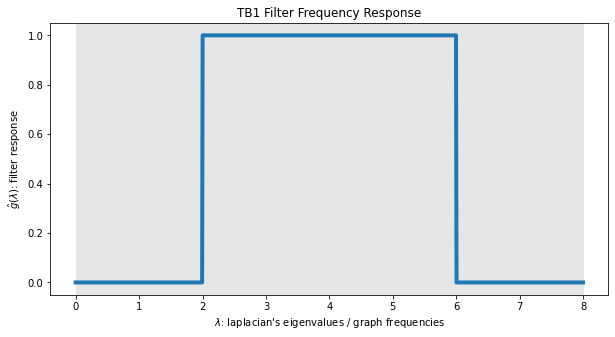

In [73]:
center = G.lmax/2
a = center/(G.lmax*2)
def tb1(x):
    y = np.zeros(len(x))
    for i in range(0,len(x)):
        if((x[i] < (center/2)) or (x[i] > (center + (center/2)))):
            y[i] = 0
        else:
            y[i] = 1
    return(y)

tb1 = filters.Filter(G, tb1)
fig, ax = plt.subplots()
tb1.plot(plot_eigenvalues=True, ax=ax)
_ = ax.set_title('TB1 Filter Frequency Response')

In [74]:
# random state is set to a constant so results are reproducable
rs = np.random.RandomState(10)
s = np.zeros(G.N)
a = int(len(s)/9)
for i in range(0,len(s)):
    if(i < a):
        s[i] = -4
    if(i >= a and i < 2*a):
        s[i] = -3
    if(i >= 2*a and i < 3*a):
        s[i] = -2
    if(i >= 3*a and i < 4*a):
        s[i] = -1
    if(i >= 4*a and i < 5*a):
        s[i] = 0
    if(i >= 5*a and i < 6*a):
        s[i] = 1
    if(i >= 6*a and i < 7*a):
        s[i] = 2
    if(i >= 7*a and i < 8*a):
        s[i] = 3
    if(i >= 8*a):
        s[i] = 4

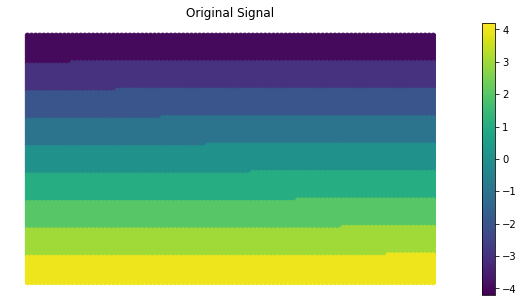

In [75]:
# Original Signal
fig, axes = plt.subplots()
G.plot_signal(s, vertex_size=20, ax=axes)
_ = axes.set_title('Original Signal')
axes.set_axis_off()

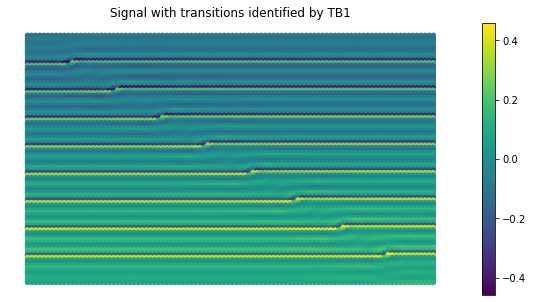

In [76]:
s2 = tb1.filter(s)
fig, axes = plt.subplots()
G.plot_signal(s2, vertex_size=20, ax=axes)
_ = axes.set_title('Signal with transitions identified by TB1')
axes.set_axis_off()

## FFR Graph for BQ on both the Ring/Grid Graphs (Figure 22)

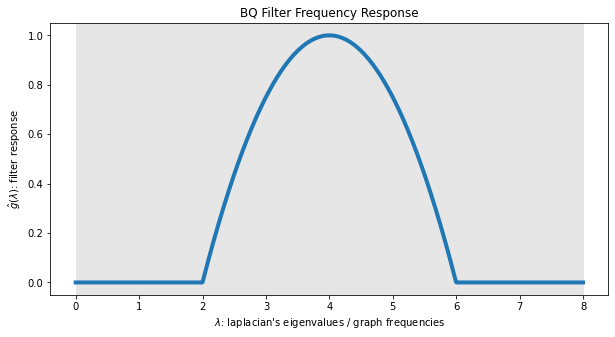

In [77]:
center = G.lmax/2
a = 1/(center/2)**2
def bq(x):
    y = np.zeros(len(x))
    for i in range(0,len(x)):
        if((x[i] < (center/2)) or (x[i] > (center + (center/2)))):
            y[i] = 0
        else:
            y[i] = -a*(x[i] - center)**2 + 1
    return(y)

bq = filters.Filter(G, bq)
fig, ax = plt.subplots()
bq.plot(plot_eigenvalues=True, ax=ax)
_ = ax.set_title('BQ Filter Frequency Response')

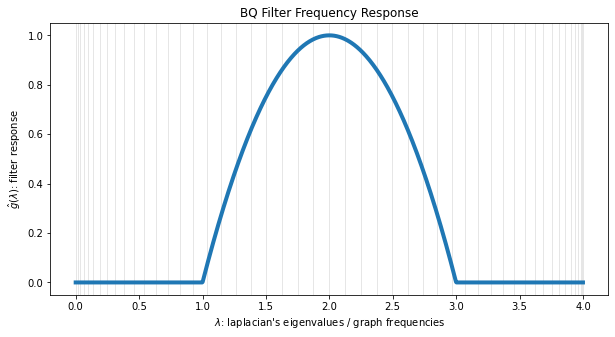

In [78]:
center = R.lmax/2
a = 1/(center/2)**2
def bq(x):
    y = np.zeros(len(x))
    for i in range(0,len(x)):
        if((x[i] < (center/2)) or (x[i] > (center + (center/2)))):
            y[i] = 0
        else:
            y[i] = -a*(x[i] - center)**2 + 1
    return(y)

bq = filters.Filter(R, bq)
fig, ax = plt.subplots()
bq.plot(plot_eigenvalues=True, ax=ax)
_ = ax.set_title('BQ Filter Frequency Response')

## More BQ FFR for the Grid Graph (Figure 23)

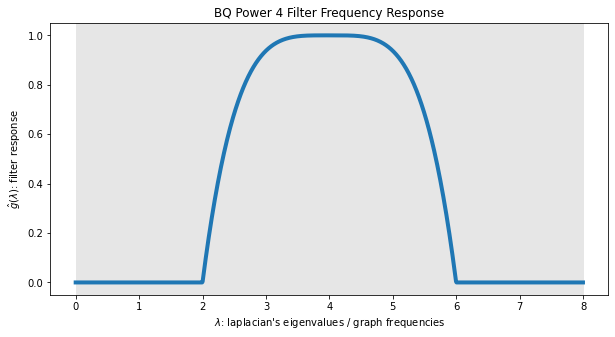

In [79]:
center = G.lmax/2
a = 1/(center/2)**4
def bq_4(x):
    y = np.zeros(len(x))
    for i in range(0,len(x)):
        if((x[i] < (center/2)) or (x[i] > (center + (center/2)))):
            y[i] = 0
        else:
            y[i] = -a*(x[i] - center)**4 + 1
    return(y)

bq_4 = filters.Filter(G, bq_4)
fig, ax = plt.subplots()
bq_4.plot(plot_eigenvalues=True, ax=ax)
_ = ax.set_title('BQ Power 4 Filter Frequency Response')

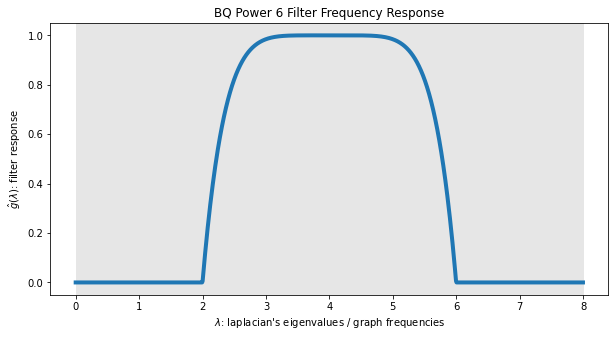

In [80]:
center = G.lmax/2
a = 1/(center/2)**6
def bq_6(x):
    y = np.zeros(len(x))
    for i in range(0,len(x)):
        if((x[i] < (center/2)) or (x[i] > (center + (center/2)))):
            y[i] = 0
        else:
            y[i] = -a*(x[i] - center)**6 + 1
    return(y)

bq_6 = filters.Filter(G, bq_6)
fig, ax = plt.subplots()
bq_6.plot(plot_eigenvalues=True, ax=ax)
_ = ax.set_title('BQ Power 6 Filter Frequency Response')

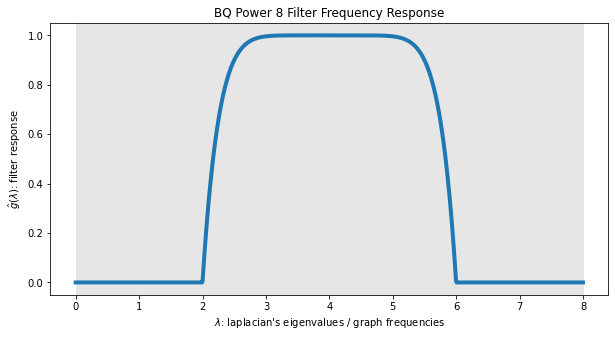

In [81]:
center = G.lmax/2
a = 1/(center/2)**8
def bq_8(x):
    y = np.zeros(len(x))
    for i in range(0,len(x)):
        if((x[i] < (center/2)) or (x[i] > (center + (center/2)))):
            y[i] = 0
        else:
            y[i] = -a*(x[i] - center)**8 + 1
    return(y)

bq_8 = filters.Filter(G, bq_8)
fig, ax = plt.subplots()
bq_8.plot(plot_eigenvalues=True, ax=ax)
_ = ax.set_title('BQ Power 8 Filter Frequency Response')

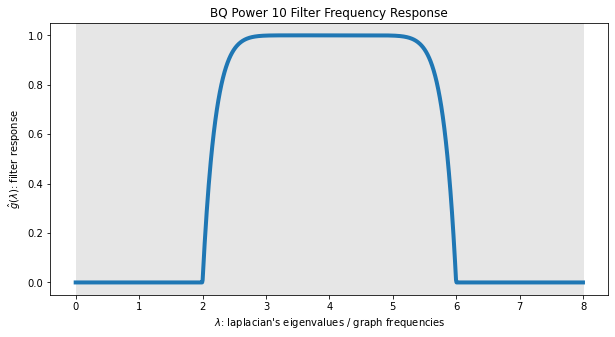

In [82]:
center = G.lmax/2
a = 1/(center/2)**10
def bq_10(x):
    y = np.zeros(len(x))
    for i in range(0,len(x)):
        if((x[i] < (center/2)) or (x[i] > (center + (center/2)))):
            y[i] = 0
        else:
            y[i] = -a*(x[i] - center)**10 + 1
    return(y)

bq_10 = filters.Filter(G, bq_10)
fig, ax = plt.subplots()
bq_10.plot(plot_eigenvalues=True, ax=ax)
_ = ax.set_title('BQ Power 10 Filter Frequency Response')

## Applying the BQ power 2 to the Grid Graph (Figure 24)

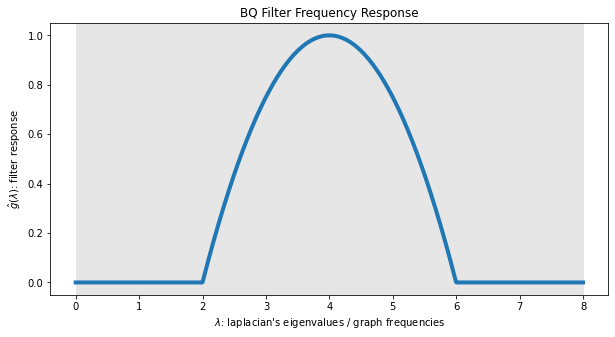

In [83]:
center = G.lmax/2
a = 1/(center/2)**2
def bq(x):
    y = np.zeros(len(x))
    for i in range(0,len(x)):
        if((x[i] < (center/2)) or (x[i] > (center + (center/2)))):
            y[i] = 0
        else:
            y[i] = -a*(x[i] - center)**2 + 1
    return(y)

bq = filters.Filter(G, bq)
fig, ax = plt.subplots()
bq.plot(plot_eigenvalues=True, ax=ax)
_ = ax.set_title('BQ Filter Frequency Response')

In [84]:
# random state is set to a constant so results are reproducable
rs = np.random.RandomState(10)
s = np.zeros(G.N)
a = int(len(s)/9)
for i in range(0,len(s)):
    if(i < a):
        s[i] = -4
    if(i >= a and i < 2*a):
        s[i] = -3
    if(i >= 2*a and i < 3*a):
        s[i] = -2
    if(i >= 3*a and i < 4*a):
        s[i] = -1
    if(i >= 4*a and i < 5*a):
        s[i] = 0
    if(i >= 5*a and i < 6*a):
        s[i] = 1
    if(i >= 6*a and i < 7*a):
        s[i] = 2
    if(i >= 7*a and i < 8*a):
        s[i] = 3
    if(i >= 8*a):
        s[i] = 4

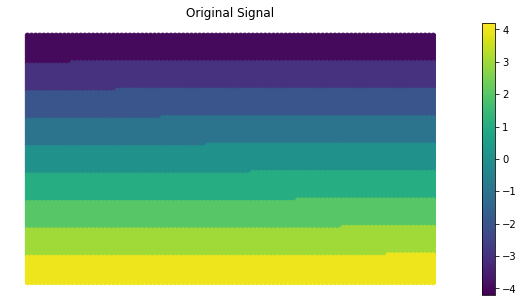

In [85]:
# Original Signal
fig, axes = plt.subplots()
G.plot_signal(s, vertex_size=20, ax=axes)
_ = axes.set_title('Original Signal')
axes.set_axis_off()

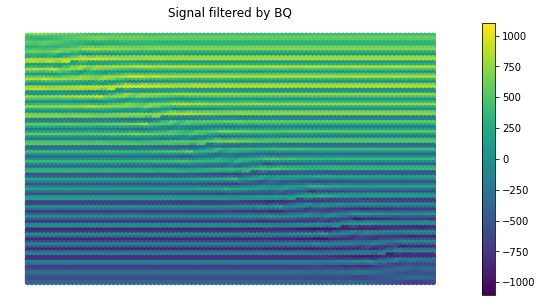

In [86]:
s2 = bq.filter(s)
fig, axes = plt.subplots()
G.plot_signal(s2, vertex_size=20, ax=axes)
_ = axes.set_title('Signal filtered by BQ')
axes.set_axis_off()

## Applying the BQ power 2 filter to the Ring Graph (Figure 25)

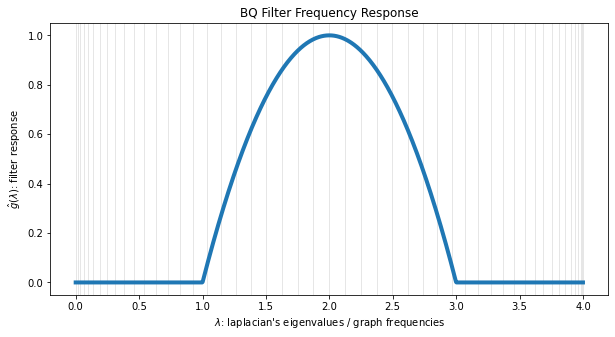

In [87]:
center = R.lmax/2
a = 1/(center/2)**2
def bq(x):
    y = np.zeros(len(x))
    for i in range(0,len(x)):
        if((x[i] < (center/2)) or (x[i] > (center + (center/2)))):
            y[i] = 0
        else:
            y[i] = -a*(x[i] - center)**2 + 1
    return(y)

bq = filters.Filter(R, bq)
fig, ax = plt.subplots()
bq.plot(plot_eigenvalues=True, ax=ax)
_ = ax.set_title('BQ Filter Frequency Response')

In [88]:
# So that the results can be reproduced
rs = np.random.RandomState(10)
r = np.zeros(R.N)
for i in range(0,100):
    if(i < 10):
        r[i] = 0
    if(i >= 10 and i < 20):
        r[i] = 1
    if(i >= 20 and i < 30):
        r[i] = 2
    if(i >= 30 and i < 40):
        r[i] = 3
    if(i >= 40 and i < 50):
        r[i] = 4
    if(i >= 50 and i < 60):
        r[i] = 5
    if(i >= 60 and i < 70):
        r[i] = 4
    if(i >= 70 and i < 80):
        r[i] = 3
    if(i >= 80 and i < 90):
        r[i] = 2
    if(i >= 90 and i < 100):
        r[i] = 1

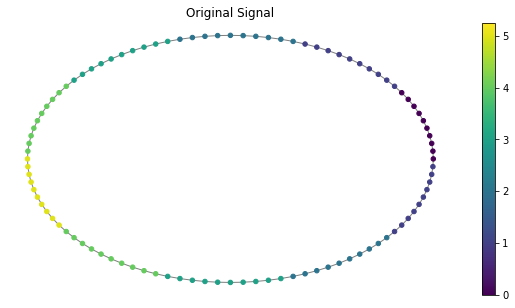

In [89]:
fig, axes = plt.subplots()
R.plot_signal(r, vertex_size=20, ax=axes)
_ = axes.set_title('Original Signal')
axes.set_axis_off()

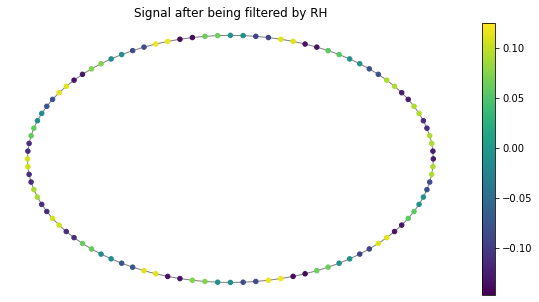

In [90]:
r2 = bq.filter(r)
fig, axes = plt.subplots()
R.plot_signal(r2, vertex_size=20, ax=axes)
_ = axes.set_title('Signal after being filtered by RH')
axes.set_axis_off()